# CNN (MNIST)
## 1. Library, Data Preprocessing 
## 2. Solve classification with Pytorch
## 3. Show the result 

# Library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dataset # for loading dataset (mnist)
import torchvision.transforms as transforms # for processing datasets
from torch.utils.data import DataLoader # for making dataset easier to use 

from matplotlib import pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

device: gpu


# Hyper parameter setting

In [2]:
# hypter parameter setting
learning_rate = 1e-4
epochs = 30
display_step = 10 # 학습 몇번마다 확인할 것인지. 
batch_size = 32

activation = nn.ReLU()
max_pool = nn.MaxPool2d(2,2) # 파라미터 kernel size(2면 2x2), stride size, padding size 

# Load data & Pre-process data

len(train_data):  60000
len(test_data):  10000
data tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
     

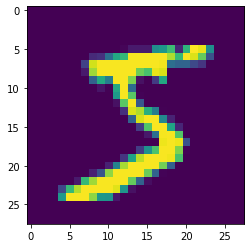

data shape: torch.Size([32, 1, 28, 28])
label: tensor([4, 8, 5, 9, 2, 8, 9, 6, 2, 5, 7, 4, 9, 6, 6, 1, 0, 7, 4, 2, 8, 0, 1, 4,
        7, 1, 2, 1, 6, 1, 0, 1])


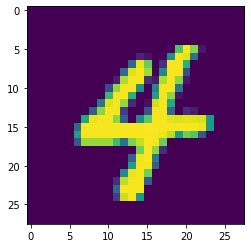

In [3]:
# load data
train_data = dataset.MNIST("./", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
# transform 이미지를 텐서로 바꿔준다. , target_transform 원핫 인코딩 할 것인지.
test_data = dataset.MNIST("./", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)

# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
print('data', x_train)
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train[0])
plt.show()

# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
# droplast 남는것 버려라. 
# num_workers cpu작업을 몇개의 코어를 사용해서 진행 할 지 대한 설정 파라미터.

# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

plt.figure()
plt.imshow(example_data[0][0])
plt.show()

# Model & Optimization and Loss function

In [7]:
# nn.Module 상속 반드시 받아줘야함 이유는 모름
# feature 추출부분 추출한 것 classifier
# flatten 입출력 matrix 이기 때문에 벡터 표현을 하기위하여 다 펴주는 작업. 
# conv2d 채널 1개라 1 만약 color면 3개 2번재 출력 채널 갯수 3para = 커널싸이즈

# 1 x 28 x28 이라하면 5x5를 3x3으로 했을때 
# nn.Conv2d(1,20,5)
# nn.Conv2d(20,50,5)
# 
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() # for initializing nn.Module (parent class)
        self.feature_extraction = nn.Sequential(# 1x 28 x 28
            nn.Conv2d(1, 16, 3), #16 x 24 x 24 , 16 x 26 x 26 # number of input channel, number of output channel, kernel size   
            activation,          # we can set stride size and padding size. if we do not set the these parameters, default value is 1, 0.
            nn.Conv2d(16, 32,3), #32 x 20 x 20 , 32 x 24 x 24
            activation,
            max_pool,          # 32x 10 x 10   , 32x 12 x 12
            #pooling 은 옵션이고 항상 사용하지 않아도 됨. 
            
            nn.Conv2d(32,64,3),#  64 x 6 x 6   , 64x 10 x 10
            activation,
            max_pool     # 64x3 x 3, 64 x 5 x 5
        )
        self.classifier = nn.Sequential( # nn.linear 항상 계산해서 구해줘야하냐? 
            nn.Linear(64 * 5 * 5, 100), # 100은 노드의 갯수이다. 
            activation,
            nn.Linear(100, 10)
        )

        
    def forward(self, x):
        extracted_feature = self.feature_extraction(x) # [32, 64, 3, 3]
        flatten = extracted_feature.view(batch_size, -1) # [32, 576 (64 * 3 * 3)]
        result = self.classifier(flatten)
        return result

model = CNN().to(device)
model.train()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

# Train & Test

In [8]:
loss_array = []

# train the model
for i in range(epochs):
    for index, [data, label] in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
                
        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_function(output, label)
        loss.backward()
        optimizer.step()
        
    if i % display_step == 0:
        print('{} epoch loss: {}'.format(i,loss))
        loss_array.append(loss.cpu().detach().numpy())

0 epoch loss: 2.309351682662964
10 epoch loss: 2.299518346786499
20 epoch loss: 2.2363266944885254


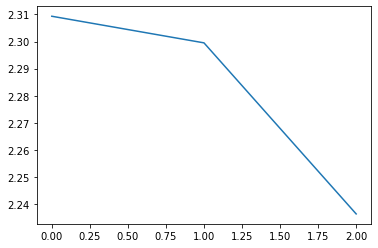

In [9]:
plt.figure()
plt.plot(loss_array)
plt.show()

In [10]:
#test the model
model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()

    print("Accuracy of the model: {}".format(correct/total))

Accuracy of the model: 0.7442908883094788



# Advanced: Learning rate scheduler

/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


0 epoch lr: [9.801e-05]
0 epoch loss: 0.8417019844055176


/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


10 epoch lr: [8.863848717161295e-05]
10 epoch loss: 0.8465995192527771
20 epoch lr: [8.016305895390461e-05]
20 epoch loss: 0.10444057732820511


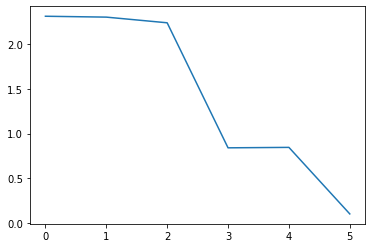

Accuracy of the model: 0.9228765964508057


In [11]:
#learning rate scheduler

# 기본적으로 처음에는 learning rate을 크게하고 점점 줄이게 하여 수렴
# 낙타 봉 두개 중에 오른쪽에서 내려가는 것이라고 이해하면 됨. 
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 1, gamma = 0.99)  # this function decreast learning for each step size
# step _size 몇 에폭 마다. 그리고 gamma를 곱해줌. 즉 조금씩 작아지게 됨. 
#
for i in range(epochs):
    scheduler.step()
    for index, [image, label] in enumerate(train_loader):
        x = image.to(device)
        y = label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_function(output, y)
        loss.backward()
        optimizer.step()
        
        
    if i % display_step ==0:
        print('{} epoch lr: {}'.format(i,scheduler.get_lr()))
        print('{} epoch loss: {}'.format(i,loss))
        loss_array.append(loss.cpu().detach().numpy())

#plot the loss  
plt.figure()
plt.plot(loss_array)
plt.show()            

#test the model
correct = 0
total = 0
with torch.no_grad():
    for index, [data, label] in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, result = torch.max(output, 1)
        
        total += label.size(0)
        correct += (result == label).sum().float()

    print("Accuracy of the model: {}".format(correct/total))

# CNN (CIFAR10)
1. Library, Data Preprocessing
2. Solve classification with Pytorch
3. Show the result

# Library

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dataset # for loading dataset (mnist)
import torchvision.transforms as transforms # for processing datasets
from torch.utils.data import DataLoader # for making dataset easier to use 

from matplotlib import pyplot as plt
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

device: gpu


# Hyper parameter setting

In [13]:
# hypter parameter setting
learning_rate = 1e-4
training_epochs = 100
display_step = 10
batch_size = 32
momentum = 0.9
##  이전에 gradient 정보들을 저장해 주는 것. 
##  웅덩이를 넘게 해주는 것. 
activation = nn.ReLU()
max_pool = nn.MaxPool2d(2,2) # kerel size, stride size, padding size 

# Load data & Pre-process data

78.9%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

98.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Files already downloaded and verified
len(train_data):  50000
len(test_data):  10000
data tensor([[[0.2314, 0.2431, 0.2471],
         [0.1686, 0.1804, 0.1765],
         [0.1961, 0.1882, 0.1686],
         ...,
         [0.6196, 0.5176, 0.4235],
         [0.5961, 0.4902, 0.4000],
         [0.5804, 0.4863, 0.4039]],

        [[0.0627, 0.0784, 0.0784],
         [0.0000, 0.0000, 0.0000],
         [0.0706, 0.0314, 0.0000],
         ...,
         [0.4824, 0.3451, 0.2157],
         [0.4667, 0.3255, 0.1961],
         [0.4784, 0.3412, 0.2235]],

        [[0.0980, 0.0941, 0.0824],
         [0.0627, 0.0275, 0.0000],
         [0.1922, 0.1059, 0.0314],
         ...,
         [0.4627, 0.3294, 0.1961],
         [0.4706, 0.3294, 0.1961],
         [0.4275, 0.2863, 0.1647]],

        ...,

        [[0.8157, 0.6667, 0.3765],
         [0.7882, 0.6000, 0.1333],
         [0.7765, 0.6314, 0.1020],
         ...,
         [0.6275, 0.5216, 0.2745],
         [0.2196, 0.1216, 0.0275],
         [0.2078, 0.1333, 0.0

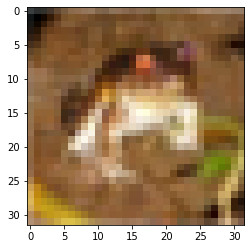

In [14]:
# load data
train_data = dataset.CIFAR10("./", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
test_data = dataset.CIFAR10("./", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)
# 다운로드 True 있으면 있는거 쓰고 없으면 다운 받아라. 
# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
x_train = np.transpose(x_train, (1, 2, 0))

print('data', x_train)
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train)
plt.show()

data shape: torch.Size([32, 3, 32, 32])
label: tensor([2, 7, 8, 4, 1, 7, 9, 3, 2, 5, 5, 0, 5, 9, 8, 7, 9, 8, 4, 6, 9, 9, 3, 7,
        6, 5, 7, 8, 6, 6, 5, 1])


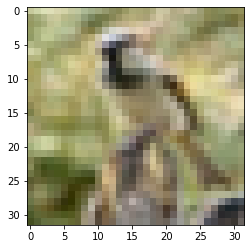

In [15]:
# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)

# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

check_image = example_data[0]
check_image = np.transpose(check_image, (1, 2, 0))

plt.figure()
plt.imshow(check_image)
plt.show()

# Model & Optimization and Loss function

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() # for initializing nn.Module (parent class)
        self.feature_extraction = nn.Sequential( 32 x 32 x 1
            nn.Conv2d(3, 16, 5),#16 x 28 x28   16x 30 x 30 # number of input channel, number of output channel, kernel size   
            activation,          # we can set stride size and padding size. if we do not set the these parameters, default value is 1, 0.
            nn.Conv2d(16, 32,5),#32 x 24 x 24  32 x 28 x 28
            activation,
            max_pool, # 32 x 12 x 12   32 x 14 x 14
            nn.Conv2d(32,64,5), # 64 x 8 x 8   64 x  12 x 12
            activation,
            max_pool # 64 x 4 x 4   64 x 8 x 8
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 4 * 4, 100), # 32 x 100 =>shape
            activation,
            nn.Linear(100, 10) 32 x 10
        )# classifier 는 fully conneted 행렬이라 생각, 행렬끼리 곱하기 위하여 
         # 앞의 열과 뒤의 행이 같아야 곱할 수 있기 때문
    def forward(self, x):  # 배치갯수 32 x 채널 3 x height 32 x width 32
        extracted_feature = self.feature_extraction(x) # [32, 64, 4, 4]
        flatten = extracted_feature.view(batch_size, -1)# -1은 알아서 하라고하는 것 # [32, 64 * 4 * 4]
        result = self.classifier(flatten)
        return result
    # 100 dimensional vector
    # numpy - reshape ( 5,-1)
    # torch - view(-1,5)

model = CNN().to(device)
model.train()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)

# Train & Test

In [17]:
loss_array = []

# train the model
for i in range(training_epochs):
    for index, [data, label] in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
                
        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_function(output, label)
        loss.backward()
        optimizer.step()
        
    if i % display_step == 0:
        print('{} epoch loss: {}'.format(i,loss))
        loss_array.append(loss.cpu().detach().numpy())

0 epoch loss: 2.3000857830047607
10 epoch loss: 1.9625393152236938


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/e

20 epoch loss: 1.6732796430587769


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/e

30 epoch loss: 1.4830292463302612


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/e

40 epoch loss: 1.2885799407958984


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/e

50 epoch loss: 0.9553915858268738


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/e

60 epoch loss: 0.9514252543449402


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/e

70 epoch loss: 1.0737791061401367


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/e

80 epoch loss: 0.9173083901405334


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/e

90 epoch loss: 0.9376691579818726


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f86ce966560>
Traceback (most recent call last):
  File "/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/piai/anaconda3/e

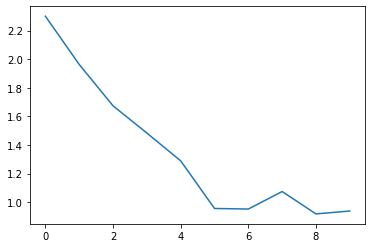

In [18]:
plt.figure()
plt.plot(loss_array)
plt.show()

In [19]:
#test the model
model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()

    print("Accuracy of the model: {}".format(correct/total))

Accuracy of the model: 0.6176882982254028


# Generative Adversarial Networks

# Library & Hyper parameter setting

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dataset
import torchvision.utils as utils
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

# hypter parameter setting
learning_rate = 2e-4
epochs = 200
batch_size = 32
display_step = 5 

z_size = 50
# 제너레이터의 입력으로 어떤 임의의 노이즈값 샘플링 결국 진짜데이터에 맵핑
# 입력으로 들어온 z 라는 벡터 자체도 충분한 너무작지않은 적당히 큰 값 


device: gpu


## Load data and pre-process data

len(train_data):  60000
data tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, 

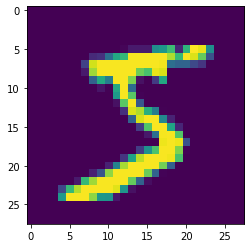

data shape: torch.Size([32, 1, 28, 28])
label: tensor([1, 7, 4, 1, 1, 1, 5, 3, 6, 0, 3, 9, 4, 1, 0, 1, 9, 4, 0, 9, 5, 9, 0, 8,
        1, 0, 1, 8, 7, 3, 1, 8])


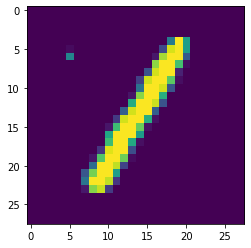

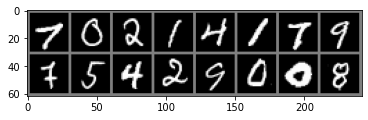

In [21]:
train_data = dataset.MNIST("./", train = True, transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize(mean=(0.5,),   
                                         std=(0.5,))]), target_transform = None, download = True)
# 평균 0.5 표준편차 0.5로 노말라이즈

test_data = dataset.MNIST("./", train = False, transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize(mean=(0.5,),   
                                         std=(0.5,))]), target_transform = None, download = True)

# check the data
print('len(train_data): ', len(train_data))

x_train, y_train = train_data[0]
print('data', x_train)
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train[0])
plt.show()

# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

plt.figure()
plt.imshow(example_data[0][0])
plt.show()


def imshow(img):
    img = (img+1)/2    # 노말라이제이션 -1~1로 스케일
    img = img.squeeze() #불필요한 차원 제거
    np_img = img.numpy()
    plt.imshow(np_img, cmap='gray')
    plt.show()

def imshow_grid(img): 
    img = utils.make_grid(img.cpu().detach()) # grid형식으로 찍어주는
    img = (img+1)/2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
(images, labels)  = next(iter(train_loader))
imshow_grid(images[0:16,:,:])

# Model & Optimization and Loss function

/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


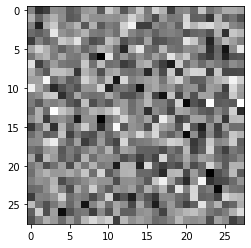

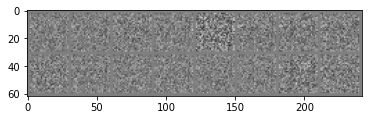

torch.Size([32, 784])
torch.Size([32, 1])
tensor([[0.5073, 0.5173, 0.4760, 0.4407, 0.5291, 0.5043, 0.4370, 0.4919, 0.5023,
         0.4990, 0.4822, 0.4636, 0.5054, 0.4796, 0.5216, 0.4891]],
       device='cuda:0', grad_fn=<TransposeBackward0>)


In [22]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(z_size, 256)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 256)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 28*28)# 마지막 레이어 만들고자하는 shape
        self.act3 = nn.Tanh()
    def forward(self, z):
        out = self.fc1(z)
        out = self.act1(out)
        out = self.fc2(out)
        out = self.act2(out)
        out = self.fc3(out)
        out = self.act3(out)
        
        return out
# z_size = 임의의 디스트리메이터에서 샘플링 한 값  

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 256)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 1)
        self.act3 = nn.Sigmoid()
    def forward(self, x):
        out = self.fc1(x)
        out = self.act1(out)
        out = self.fc2(out)
        out = self.act2(out)
        out = self.fc3(out)
        out = self.act3(out)
        
        return out

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)
                
Generator = Generator()
Generator.apply(init_weights)
Generator.to(device)
Generator.train()

Discriminator = Discriminator()
Discriminator.apply(init_weights)
Discriminator.to(device)
Discriminator.train()


Generator_optimizer = torch.optim.Adam(Generator.parameters(), lr = learning_rate)
Discriminator_optimizer = torch.optim.Adam(Discriminator.parameters(), lr = learning_rate)
## optimizer 각각 생성해주어야함. 


# make noise
z = torch.randn(1, z_size).to(device) # batch size, z size
# 가짜 이미지 생성하기
img_fake = Generator(z).view(-1,28,28)
# 이미지 출력하기
imshow(img_fake.squeeze().cpu().detach())

# Batch SIze만큼 노이즈 생성하여 그리드로 출력하기
z = torch.randn(batch_size, z_size).to(device)
img_fake = Generator(z)
img_fake = img_fake.reshape(32,28,28)
img_fake = img_fake.unsqueeze(1)
imshow_grid(img_fake[0:16,:,:])


print(Generator(z).shape)
print(Discriminator(Generator(z)).shape)
print(Discriminator(Generator(z)[0:16]).transpose(0,1))

# Train & Test

(epoch 1/200) D_loss: 0.305993, G_loss: 2.882554


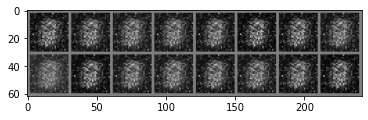

(epoch 6/200) D_loss: 0.838595, G_loss: 3.878631


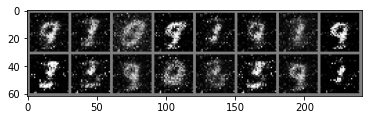

(epoch 11/200) D_loss: 0.849596, G_loss: 2.280807


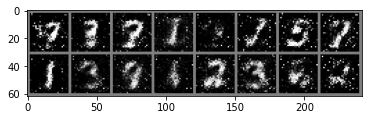

(epoch 16/200) D_loss: 0.543943, G_loss: 2.316464


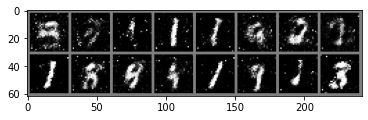

(epoch 21/200) D_loss: 0.809854, G_loss: 1.490624


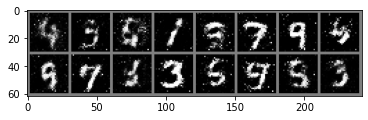

(epoch 26/200) D_loss: 0.771605, G_loss: 1.918610


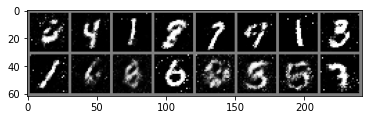

(epoch 31/200) D_loss: 0.965235, G_loss: 1.533785


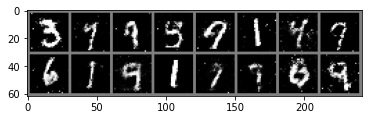

(epoch 36/200) D_loss: 1.211976, G_loss: 1.172127


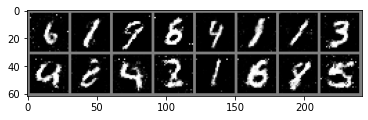

(epoch 41/200) D_loss: 1.016128, G_loss: 1.489493


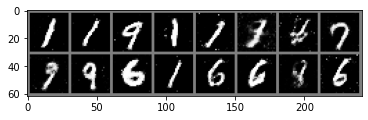

(epoch 46/200) D_loss: 1.152122, G_loss: 1.317142


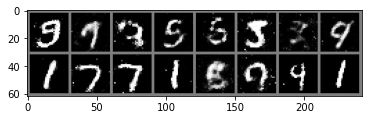

(epoch 51/200) D_loss: 1.023930, G_loss: 0.825705


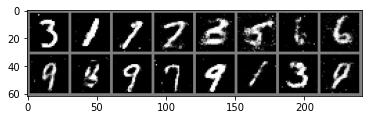

(epoch 56/200) D_loss: 0.743439, G_loss: 1.448590


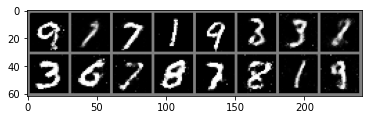

(epoch 61/200) D_loss: 0.817364, G_loss: 1.189677


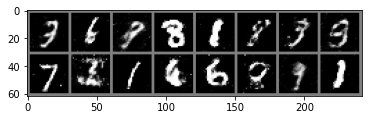

(epoch 66/200) D_loss: 1.237841, G_loss: 1.433415


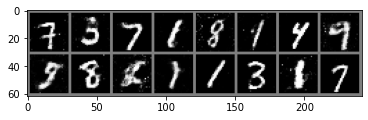

(epoch 71/200) D_loss: 1.122800, G_loss: 1.488250


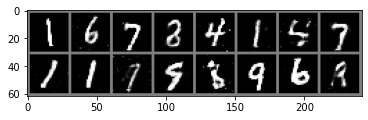

(epoch 76/200) D_loss: 1.071723, G_loss: 1.190912


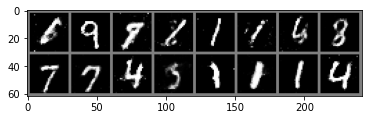

(epoch 81/200) D_loss: 1.004109, G_loss: 1.362875


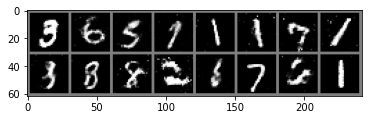

(epoch 86/200) D_loss: 0.980527, G_loss: 1.783830


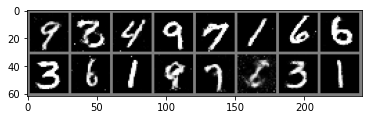

(epoch 91/200) D_loss: 0.948770, G_loss: 1.426049


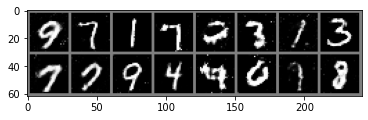

(epoch 96/200) D_loss: 1.075994, G_loss: 1.743187


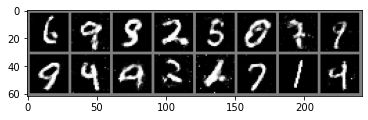

(epoch 101/200) D_loss: 0.853774, G_loss: 1.440630


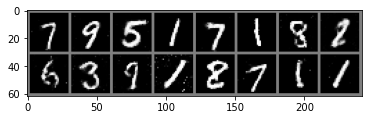

(epoch 106/200) D_loss: 0.756445, G_loss: 1.443901


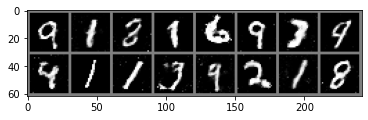

(epoch 111/200) D_loss: 1.062642, G_loss: 1.597319


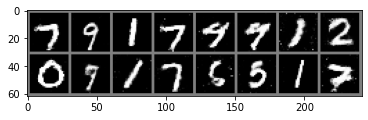

(epoch 116/200) D_loss: 0.900735, G_loss: 1.458974


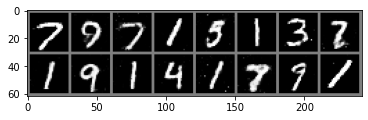

(epoch 121/200) D_loss: 0.908401, G_loss: 1.128688


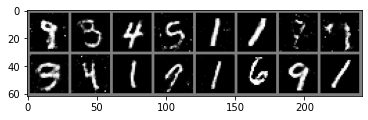

(epoch 126/200) D_loss: 0.863835, G_loss: 1.162924


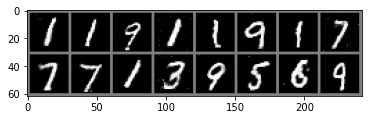

(epoch 131/200) D_loss: 1.129096, G_loss: 1.433386


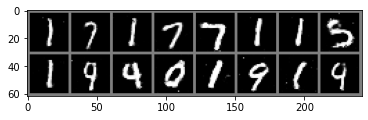

(epoch 136/200) D_loss: 1.113549, G_loss: 1.430560


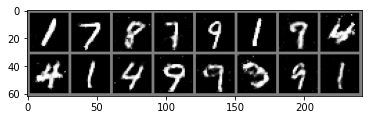

(epoch 141/200) D_loss: 0.887531, G_loss: 1.416146


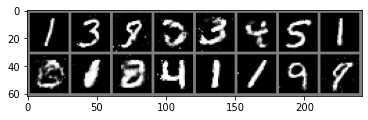

(epoch 146/200) D_loss: 0.966165, G_loss: 1.585809


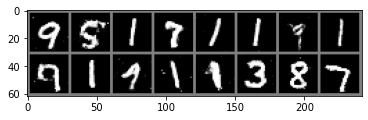

(epoch 151/200) D_loss: 0.884880, G_loss: 1.222589


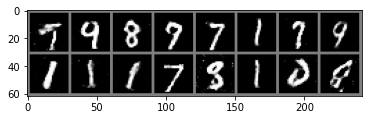

(epoch 156/200) D_loss: 0.785429, G_loss: 1.525247


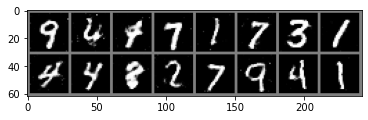

KeyboardInterrupt: 

In [23]:
Discriminator_list = []
Generator_list = []

Generator.train()
Discriminator.train()

for epoch in range(epochs):    
    for iteration, (data, label) in enumerate(train_loader):
        
        data = data.to(device)
        label = label.to(device) 

        z = torch.randn(batch_size, z_size).to(device)

        Discriminator_optimizer.zero_grad()

        D_real = Discriminator(data.view(-1, 28*28))
        D_fake = Discriminator(Generator(z))
        
        Discriminator_loss = (-torch.log(D_real) - torch.log(1.- D_fake)).mean()
                
        Discriminator_loss.backward()
        Discriminator_optimizer.step()

        Generator_optimizer.zero_grad()

        z = torch.randn(batch_size, z_size).to(device)
        D_fake = Discriminator(Generator(z))
                
        Generator_loss = -1 * torch.log(D_fake).mean() 
        Generator_loss.backward()
        Generator_optimizer.step()
        
        Discriminator_list.append(Discriminator_loss)
        Generator_list.append(Generator_loss)
        
        
#     D_real = (torch.sum(Discriminator(data.view(-1, 28*28))).item())
#     noise = torch.randn(batch_size, z_size).cuda()
#     D_fake = (torch.sum(Discriminator(Generator(noise))).item())

#     D_real_list.append(D_real)
#     D_fake_list.append(D_fake) 
    
    if(epoch % display_step == 0):
        z = torch.randn(16, z_size).to(device)
        print('(epoch %i/200) D_loss: %f, G_loss: %f' % (epoch+1, Discriminator_loss, Generator_loss))
        imshow_grid(Generator(z).view(-1, 1, 28, 28))